In [16]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # 분류

In [2]:
diabetes_data = pd.read_csv('../ml/data/diabetes.csv')

print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0또는 1)

In [32]:
# 눈에 바로 보이는 결측치는 없음
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# 오차행렬, 정확도, 정밀도, 재현율 계산 함수 생성
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    # ROC-AUC
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    
    # ROC-AUC print 추가
    print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, F1 : {f1:.4f}, AUC : {roc_auc:.4f}')

**Logistic Regression으로 학습 및 예측 수행**

In [17]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, v_train, v_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, v_train)
pred = lr_clf.predict(X_test)

pred_proba = lr_clf.predict_proba(X_test)[:, 1] # 1일 때 확률만 가져옴

get_clf_eval(v_test, pred, pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도 : 0.7727, 정밀도 : 0.7209, 재현율 : 0.5741, F1 : 0.6392, AUC : 0.7919


* 정밀도와 재현율은 서로 반대되는 개념으로 한쪽이 높아지면 다른쪽은 낮아지게 되어있다.

* 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인데 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 : 스팸메일
* 재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 : 암진단, 금융사기 판별

In [15]:
print(lr_clf.predict_proba(X_test)[:5]) # X 확률  0

[[0.97821909 0.02178091]
 [0.79164093 0.20835907]
 [0.84508788 0.15491212]
 [0.5058287  0.4941713 ]
 [0.95478926 0.04521074]]


In [20]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행 
    #정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

**precision recall 곡선 그림**

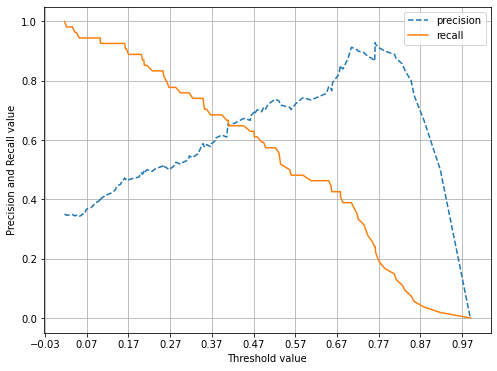

In [21]:
# 정밀도/재현율 트레이드오프(Trade-off) - 상호 보완적 평가지표
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(v_test, pred_proba_c1)

In [25]:
precisions, recalls, thresholds = precision_recall_curve(v_test, pred_proba_c1)
print(precisions.shape)
print(precisions[:5])
print()
print(recalls.shape)
print(recalls[:5].shape)
print()
print(thresholds.shape)
print(thresholds[:5])


(155,)
[0.35064935 0.34640523 0.34868421 0.34437086 0.34666667]

(155,)
(5,)

(154,)
[0.01672591 0.02178091 0.03584679 0.04203754 0.04521074]


In [28]:
# Glucose(당수치), BloodPressure(혈압).. 0이 아니면 안되는 값들이 0인 경우가 있다.
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  3.,  0.,  1.,  1.,  1.,  1.,  3.,  4.,  4.,  6.,  4.,
         7., 12.,  9., 17., 10., 15., 20., 16., 20., 17., 20., 26., 22.,
        19., 25., 25., 20., 18., 21., 18., 17., 17., 21., 25., 14., 25.,
        12., 10., 10., 16., 13., 10., 11., 12., 16.,  5.,  9.,  6., 11.,
         5., 10.,  4.,  9.,  7.,  6.,  5.,  5.,  7.,  4.,  3.,  6., 10.,
         4.,  3.,  5.,  6.,  2.,  2.,  5.,  7.,  2.]),
 array([  0.  ,   1.99,   3.98,   5.97,   7.96,   9.95,  11.94,  13.93,
         15.92,  17.91,  19.9 ,  21.89,  23.88,  25.87,  27.86,  29.85,
         31.84,  33.83,  35.82,  37.81,  39.8 ,  41.79,  43.78,  45.77,
         47.76,  49.75,  51.74,  53.73,  55.72,  57.71,  59.7 ,  61.69,
         63.68,  65.67,  67.66,  69.65,  71.64,  73.63,  75.62,  77.61,
         79.6 ,  81.59,  83.58,  85.57,  87.56,  89.55,  91.54,  93.53,
  

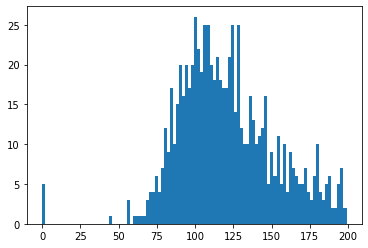

In [29]:
plt.hist(diabetes_data['Glucose'], bins=100)

In [31]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count() # 768건

# feature별로 반복하면서 데이터가 0인 값을 데이터 건수를 추출하고 퍼센트를 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print(f'{feature} 0 건수는 {zero_count}, 퍼센트는 {100*(zero_count/total_count):.2f} %')


Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [34]:
diabetes_data[zero_features].mean()

Glucose          121.681605
BloodPressure     72.254807
SkinThickness     26.606479
Insulin          118.660163
BMI               32.450805
dtype: float64

In [33]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**StandarScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용하고 0값을 평균값으로 대체한 데이터 세트로 학습/예측**

In [35]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, v_train, v_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, v_train)
pred = lr_clf.predict(X_test)

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(v_test, pred, pred_proba)
# 정확도 : 0.7727, 정밀도 : 0.7209, 재현율 : 0.5741, F1 : 0.6392, AUC : 0.7919

오차 행렬
[[89 11]
 [22 32]]
정확도 : 0.7857, 정밀도 : 0.7442, 재현율 : 0.5926, F1 : 0.6598, AUC : 0.8461


##### 분류결정 임계값을 변경하면서 성능 측정
**여러개의 분류 임계값을 변경하면서 Binarizer를 이용하여 예측값 반환**

In [39]:
# binarizer (지정한 임계값을 넘어가면 1을 반환 아니면 0)
from sklearn.preprocessing import Binarizer

X = [[ 1., -1.,  2.], [ 2.,  0.,  0.], [ 0.,  1., -1.]]
transformer = Binarizer(threshold=0.9).fit(X)
print(transformer.transform(X))

[[1. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [46]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # threshold 리스트 객체 내의 값을 차례로 iteration 하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값 :', custom_threshold, end='\n')
        print()
        
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [49]:
thresholds = [0.3 , 0.33 ,0.36, 0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(v_test, pred_proba[:, 1].reshape(-1, 1), thresholds)\

임계값 : 0.3

오차 행렬
[[68 32]
 [11 43]]
정확도 : 0.7208, 정밀도 : 0.5733, 재현율 : 0.7963, F1 : 0.6667, AUC : 0.8461
임계값 : 0.33

오차 행렬
[[73 27]
 [13 41]]
정확도 : 0.7403, 정밀도 : 0.6029, 재현율 : 0.7593, F1 : 0.6721, AUC : 0.8461
임계값 : 0.36

오차 행렬
[[77 23]
 [15 39]]
정확도 : 0.7532, 정밀도 : 0.6290, 재현율 : 0.7222, F1 : 0.6724, AUC : 0.8461
임계값 : 0.39

오차 행렬
[[82 18]
 [17 37]]
정확도 : 0.7727, 정밀도 : 0.6727, 재현율 : 0.6852, F1 : 0.6789, AUC : 0.8461
임계값 : 0.42

오차 행렬
[[84 16]
 [17 37]]
정확도 : 0.7857, 정밀도 : 0.6981, 재현율 : 0.6852, F1 : 0.6916, AUC : 0.8461
임계값 : 0.45

오차 행렬
[[86 14]
 [18 36]]
정확도 : 0.7922, 정밀도 : 0.7200, 재현율 : 0.6667, F1 : 0.6923, AUC : 0.8461
임계값 : 0.48

오차 행렬
[[88 12]
 [21 33]]
정확도 : 0.7857, 정밀도 : 0.7333, 재현율 : 0.6111, F1 : 0.6667, AUC : 0.8461
임계값 : 0.5

오차 행렬
[[89 11]
 [22 32]]
정확도 : 0.7857, 정밀도 : 0.7442, 재현율 : 0.5926, F1 : 0.6598, AUC : 0.8461


In [50]:
# 임계값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1))
get_clf_eval(v_test, pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [21 33]]
정확도 : 0.7857, 정밀도 : 0.7333, 재현율 : 0.6111, F1 : 0.6667, AUC : 0.8461
